# TOC

 - [Introduction](0-introduction.ipynb)
 - [Simple Example](1-simple-example.ipynb)
 - [Simple Example Symbolic](2-simple-example-symblic.ipynb)
 - [Pythonic MOA Array Interface](3-lazy-arrays.ipynb)
 - [Benchmarks](4-benchmarks.ipynb)

In [1]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.dnf import reduce_to_dnf
from moa.onf import reduce_to_onf
from moa.backend import generate_python_source

# Frontend

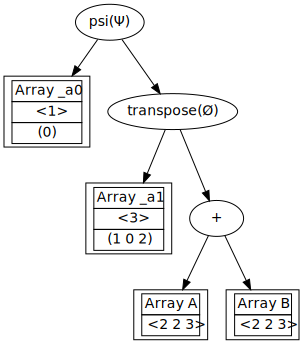

In [2]:
symbol_table, tree = parse('<0> psi (<1 0 2> tran(A ^ <2 2 3> + B ^ <2 2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

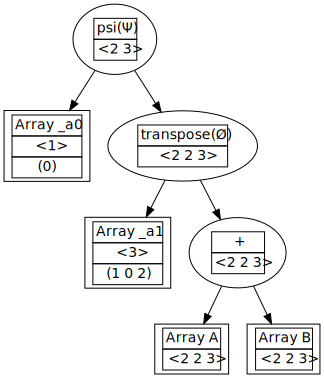

In [3]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

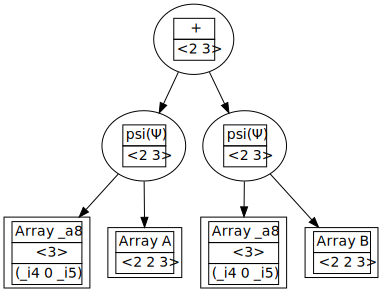

In [4]:
dnf_symbol_table, dnf_tree = reduce_to_dnf(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

Conditions can be turned off with `include_conditions=False`

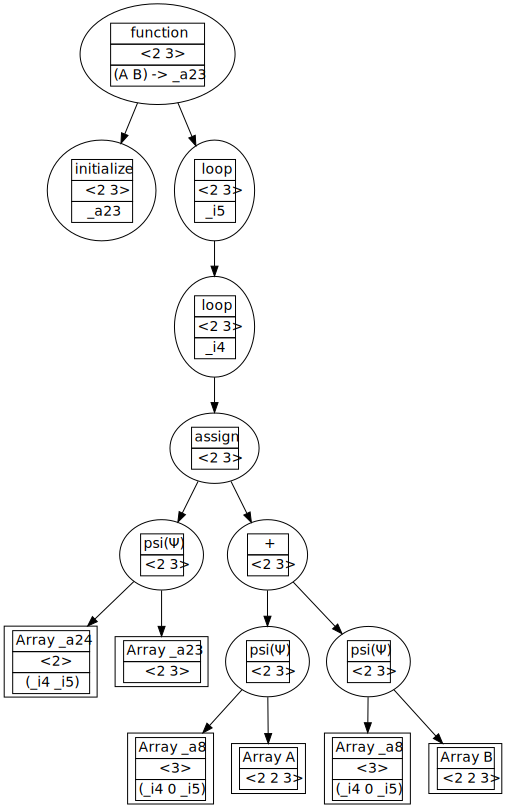

In [5]:
onf_symbol_table, onf_tree = reduce_to_onf(dnf_symbol_table, dnf_tree, include_conditions=False)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

Execute generated python source.

Condition statements are not rendered yet to python source.

In [6]:
source = generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True)
print(source)



def f(A, B):
    
    _a23 = Array((2, 3))
    
    for _i5 in range(0, 3):
        
        for _i4 in range(0, 2):
            
            _a23[(_i4, _i5)] = (A[(_i4, 0, _i5)] + B[(_i4, 0, _i5)])
    return _a23


In [7]:
exec(source)

In [8]:
from moa.array import Array

In [9]:
A = Array((2, 2, 3), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
B = Array((2, 2, 3), (13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

array = f(B, A)

In [10]:
array.shape

(2, 3)

In [11]:
array.value

[14, 16, 18, 26, 28, 30]